In [1]:

from microkit_parser import parse_log_data
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
!pip3 install scipy

In [3]:
pnk_df = pd.read_csv("new_results/pnk_meson_ffi.csv")
pnk_df

,Requested_Throughput,Receive_Throughput,Send_Throughput,Packet_Size,Minimum_RTT,Average_RTT,Maximum_RTT,Stdev_RTT,Median_RTT,???,Idle_Cycles,Total_Cycles
0,10000000,10000184,10000184,1472,27,138,221,20.07,153,0,298135829563,306937880848
1,20000000,20000342,20000342,1472,22,147,1966,37.70,153,0,156672047375,165614104511
2,50000000,50000656,50000656,1472,37,127,404,14.73,126,0,69900768836,81038071736
3,100000000,100000218,100000218,1472,31,193,489,94.76,140,0,40491742354,52690962351
4,200000000,199997519,199998519,1472,98,386,855,204.21,371,0,23883281858,38668517891
5,300000000,300001447,300001447,1472,489,675,863,82.76,675,0,18821131740,33945284002
6,400000000,399995310,399999310,1472,532,690,1032,69.43,688,0,16176997686,31528087995
7,500000000,500008994,499991494,1472,595,721,873,56.88,723,0,14338688880,30098954168
8,600000000,600005514,599999514,1472,643,747,968,45.85,745,0,12634656262,29137354797
9,700000000,700013766,699992766,1472,693,769,883,32.77,768,0,11385660715,28578998486


In [4]:
C_df = pd.read_csv("new_results/gcc_meson.csv")
C_df

,Requested_Throughput,Receive_Throughput,Send_Throughput,Packet_Size,Minimum_RTT,Average_RTT,Maximum_RTT,Stdev_RTT,Median_RTT,???,Idle_Cycles,Total_Cycles
0,10000000,10000184,10000184,1472,18,144,599,20.15,151,0,298882970481,306942343779
1,20000000,20000340,20000340,1472,9,153,678,8.54,151,0,157133819212,165625002477
2,50000000,50000650,50000650,1472,27,138,745,15.91,137,0,71124626753,81047077628
3,100000000,100000737,100000237,1472,42,181,502,87.67,141,0,40868043560,52695213119
4,200000000,199997383,199998383,1472,107,375,870,216.00,326,0,23718428161,38667256371
5,300000000,299998878,300003378,1472,516,679,871,85.29,682,0,18136015334,33931986473
6,400000000,400004583,399996583,1472,548,706,1024,73.00,698,0,15651802181,31543916854
7,500000000,500007905,499995405,1472,582,722,990,58.80,724,0,13715468644,30103525767
8,600000000,600010175,600001175,1472,648,748,855,45.66,747,0,12121950133,29137803294
9,700000000,700005132,699994632,1472,671,779,1053,36.21,778,0,10825017673,28575373430


In [ ]:
# pnk_data = parse_log_data("new_results/pnk_meson_ffi.txt")
pnk_data = parse_log_data("pnk_no_ffi/pnk_no_ffi.txt")
# C_data = parse_log_data("new_results/gcc_meson.txt")
C_data = parse_log_data("no_inline/gcc-fno-inline.txt")


In [6]:
C_data

{'configs': ['\x1bMICROKIT_CONFIG_benchmark',
  'CONFIG_BENCHMARK_TRACK_UTILISATION'],
 'dhcp': {},
 'measurements': [],
 'total_utilisation': [{'KernelUtilisation': 'd4f372ca',
   'KernelEntries': '3f7d1c',
   'NumberSchedules': '3888d2',
   'TotalUtilisation': '4777316bfa'},
  {'KernelUtilisation': 'dd1e267c',
   'KernelEntries': '41cf60',
   'NumberSchedules': '3a618b',
   'TotalUtilisation': '269005eb05'},
  {'KernelUtilisation': 'fe54acf1',
   'KernelEntries': '4cb81a',
   'NumberSchedules': '432600',
   'TotalUtilisation': '12dec9284c'},
  {'KernelUtilisation': '1277570c7',
   'KernelEntries': '5a0c62',
   'NumberSchedules': '4d2c57',
   'TotalUtilisation': 'c44e20d08'},
  {'KernelUtilisation': '18719fe8d',
   'KernelEntries': '7e4679',
   'NumberSchedules': '72cde0',
   'TotalUtilisation': '900c2effe'},
  {'KernelUtilisation': '193df2d3a',
   'KernelEntries': '868882',
   'NumberSchedules': '7f93e1',
   'TotalUtilisation': '7e681f133'},
  {'KernelUtilisation': '163d2a742',
   'K

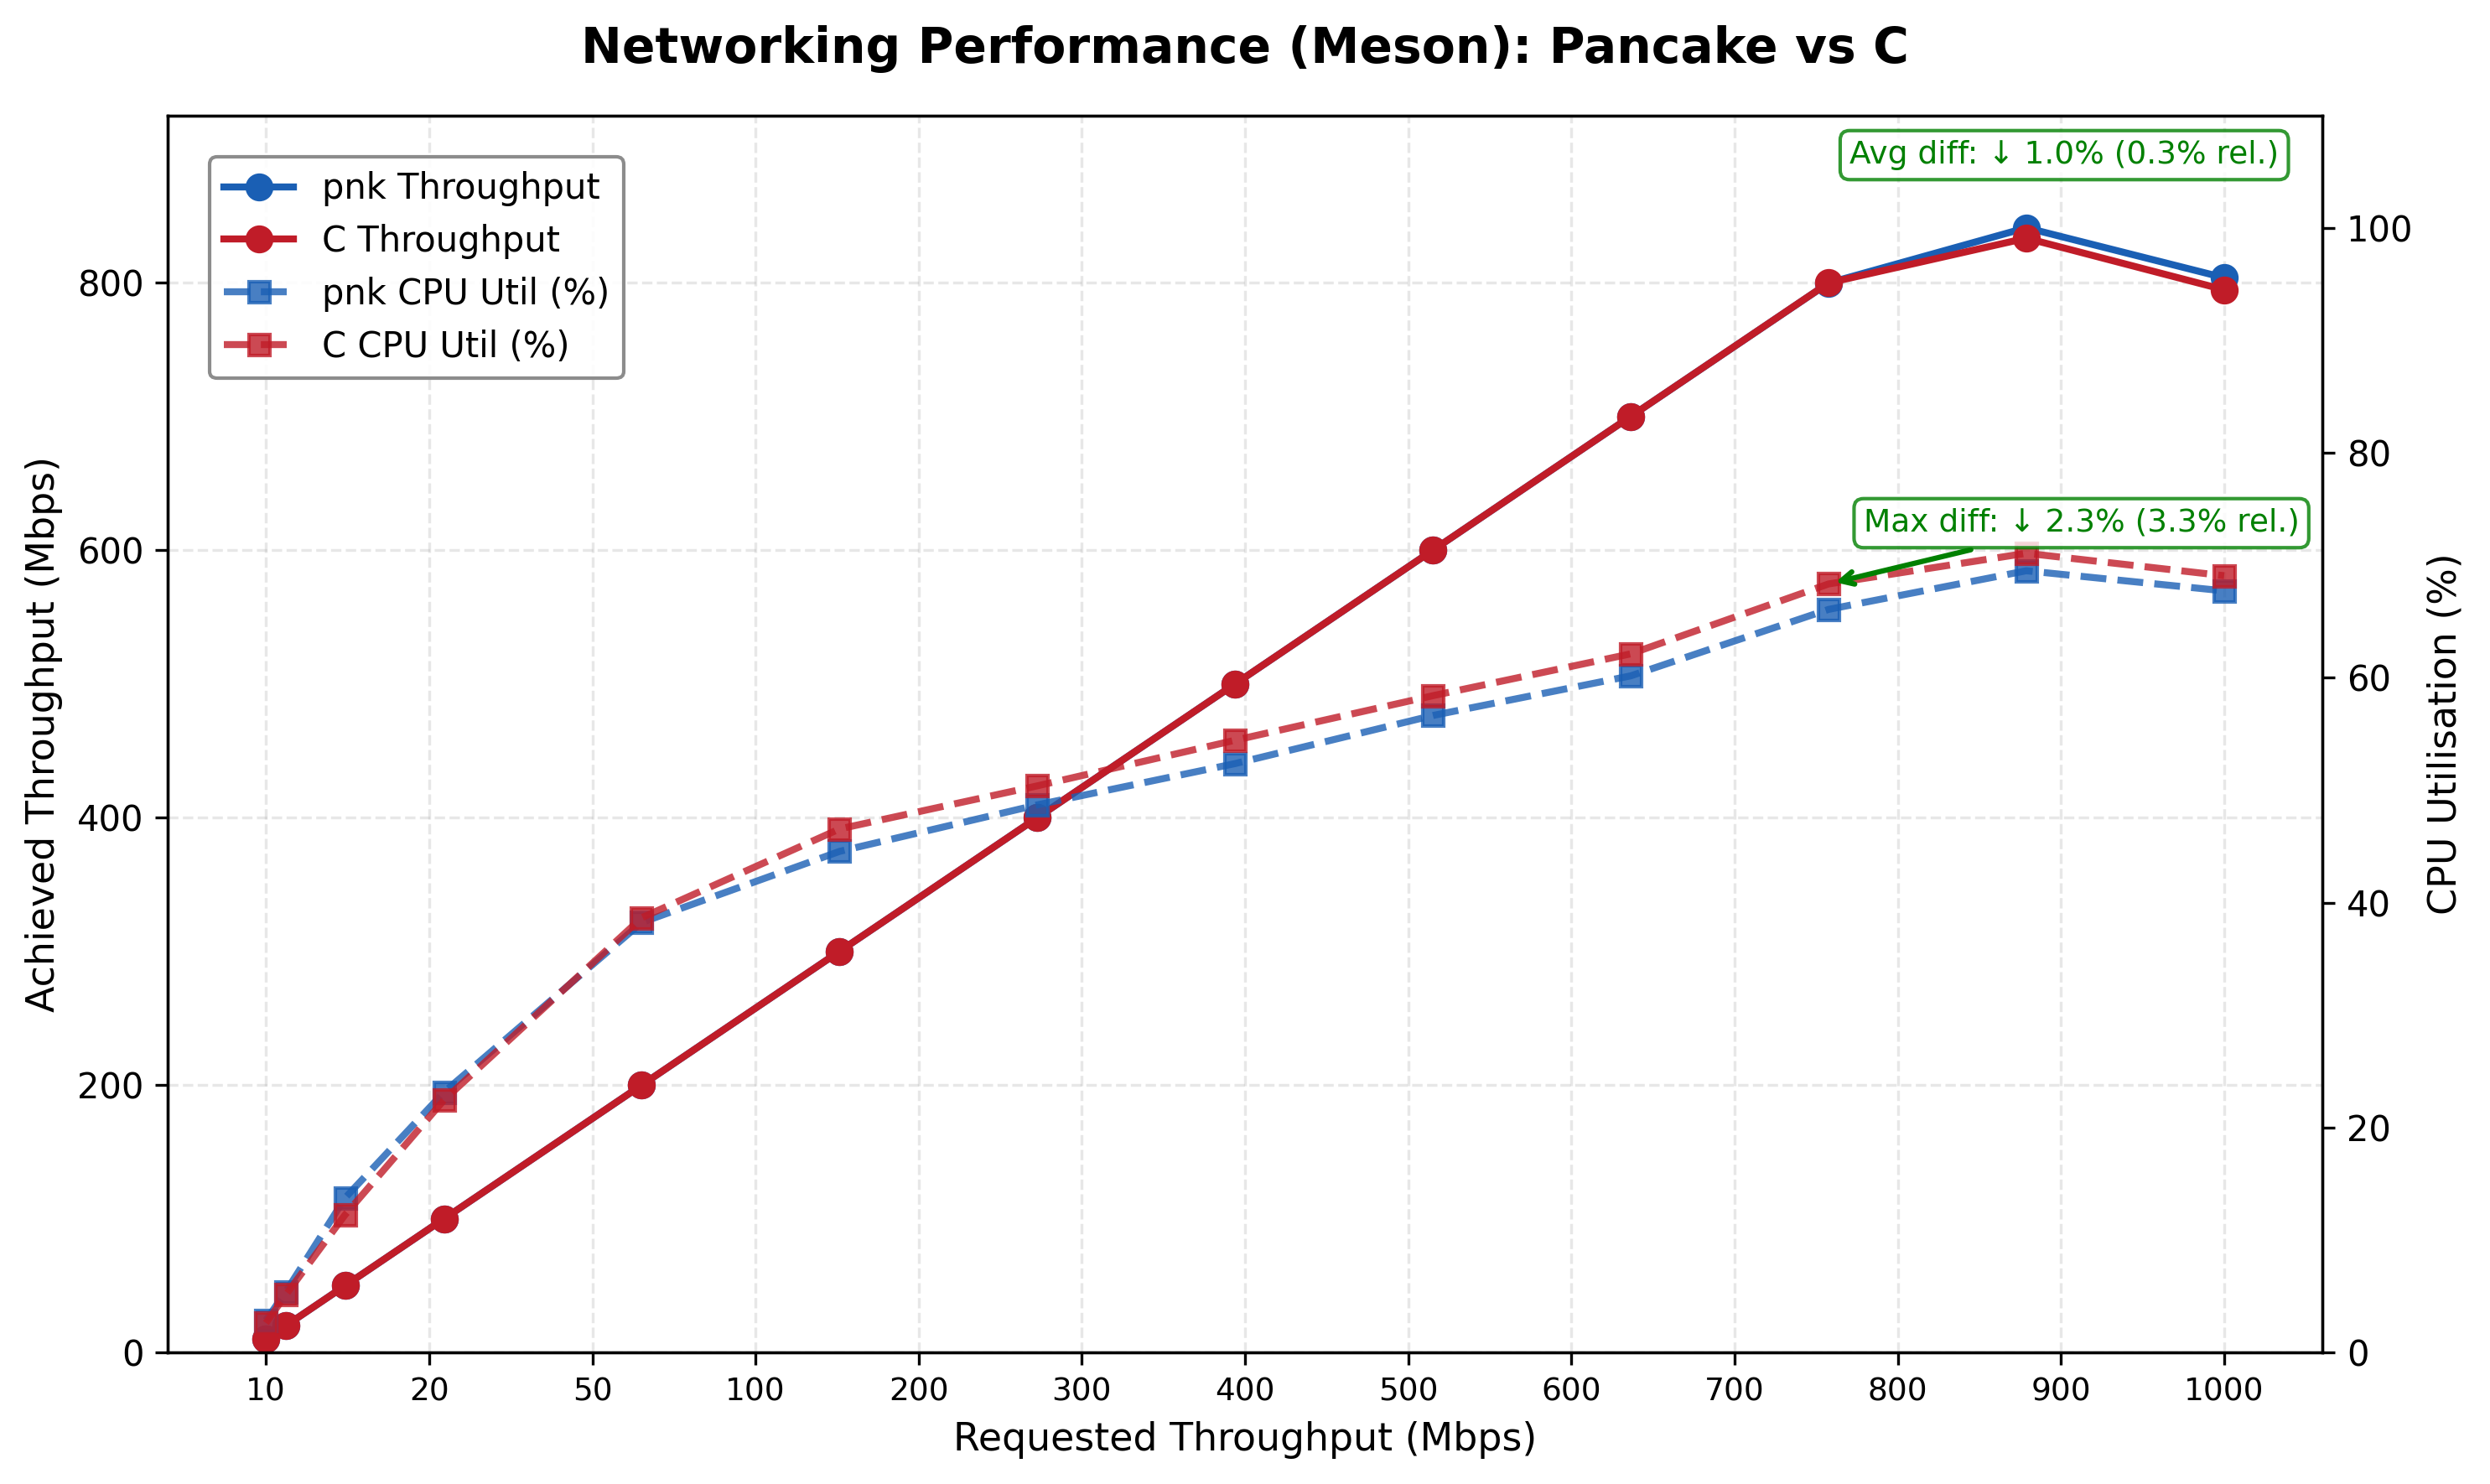

Average relative difference in CPU utilization: 0.29%


In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)

pnk_color = '#1A5FB4'
C_color = '#C01C28'

ax1.grid(True, linestyle='--', alpha=0.3, which='both')
ax1.set_axisbelow(True)

pnk_req_mbps = pnk_df['Requested_Throughput'] / 1e6
pnk_recv_mbps = pnk_df['Receive_Throughput'] / 1e6
C_req_mbps = C_df['Requested_Throughput'] / 1e6
C_recv_mbps = C_df['Receive_Throughput'] / 1e6

line1, = ax1.plot(pnk_req_mbps, pnk_recv_mbps,
                 marker='o', markersize=7, linestyle='-', linewidth=2, 
                 color=pnk_color, label='pnk Throughput')

line2, = ax1.plot(C_req_mbps, C_recv_mbps,
                 marker='o', markersize=7, linestyle='-', linewidth=2, 
                 color=C_color, label='C Throughput')

ax1.set_xlabel('Requested Throughput (Mbps)', fontsize=11)
ax1.set_ylabel('Achieved Throughput (Mbps)', fontsize=11)


ax2 = ax1.twinx()

pnk_cpu_util = [(pnk_df['Total_Cycles'][i] - pnk_df['Idle_Cycles'][i]) / pnk_df['Total_Cycles'][i]
                for i in range(len(pnk_df))]
C_cpu_util = [(C_df['Total_Cycles'][i] - C_df['Idle_Cycles'][i]) / C_df['Total_Cycles'][i]
                for i in range(len(C_df))]

line3, = ax2.plot(pnk_req_mbps, [100 * u for u in pnk_cpu_util],
                 marker='s', markersize=6, linestyle='--', linewidth=2, 
                 color=pnk_color, alpha=0.8, label='pnk CPU Util (%)')

line4, = ax2.plot(C_req_mbps, [100 * u for u in C_cpu_util],
                 marker='s', markersize=6, linestyle='--', linewidth=2, 
                 color=C_color, alpha=0.8, label='C CPU Util (%)')

max_throughput = max(max(pnk_recv_mbps), max(C_recv_mbps))
max_cpu_util = max(max([100 * u for u in pnk_cpu_util]), max([100 * u for u in C_cpu_util]))

ax1.set_ylim(0, 1.1 * max_throughput)
ax2.set_ylim(0, max(110, 1.2 * max_cpu_util))

ax2.set_ylabel('CPU Utilisation (%)', fontsize=11)
ax1.set_xticks(pnk_req_mbps)

lines = [line1, line2, line3, line4]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=10, frameon=True, 
           framealpha=0.9, edgecolor='gray', borderaxespad=1.2)

ax1.set_title('Networking Performance (Meson): Pancake vs C', 
              fontsize=14, fontweight='bold', pad=15)

ax1.set_xticks(np.linspace(min(pnk_req_mbps), max(pnk_req_mbps), len(pnk_req_mbps)))

xlabels = [f'{int(x)}' for x in pnk_req_mbps]
ax1.set_xticklabels(xlabels, fontsize=9)

diff_points = [pnk_cpu_util[i] - C_cpu_util[i] for i in range(len(pnk_cpu_util))]
max_diff_idx = np.argmax(np.abs(diff_points))
max_diff_x = pnk_req_mbps[max_diff_idx]
pnk_val = pnk_cpu_util[max_diff_idx] * 100
C_val = C_cpu_util[max_diff_idx] * 100

max_diff_absolute = pnk_val - C_val
max_diff_relative = (abs(max_diff_absolute) / C_val) * 100 if C_val != 0 else 0

is_pnk_better = max_diff_absolute < 0
box_color = 'green' if is_pnk_better else 'red'
arrow_symbol = '↓' if is_pnk_better else '↑'

annotation_text = f'Max diff: {arrow_symbol} {abs(max_diff_absolute):.1f}% ({abs(max_diff_relative):.1f}% rel.)'
ax2.annotate(annotation_text, 
            xy=(max_diff_x, max(pnk_val, C_val)),
            xytext=(10, 15), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color=box_color, lw=1.5),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec=box_color, alpha=0.8),
            fontsize=9,
            color=box_color)

relative_diff = ((np.array(pnk_cpu_util) - np.array(C_cpu_util)) / np.array(C_cpu_util)) * 100
avg_improvement = np.mean(relative_diff)
avg_absolute_diff = np.mean(np.array(pnk_cpu_util) - np.array(C_cpu_util)) * 100

is_avg_pnk_better = avg_absolute_diff < 0
avg_box_color = 'green' if is_avg_pnk_better else 'red'
avg_arrow_symbol = '↓' if is_avg_pnk_better else '↑'

avg_props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor=avg_box_color)
avg_textstr = f'Avg diff: {avg_arrow_symbol} {abs(avg_absolute_diff):.1f}% ({abs(avg_improvement):.1f}% rel.)'
ax2.text(0.98, 0.98, avg_textstr, transform=ax2.transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', bbox=avg_props,
         color=avg_box_color)

plt.tight_layout()
plt.savefig('network_perf_meson_pnk_vs_c.svg', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average relative difference in CPU utilization: {avg_improvement:.2f}%")


In [8]:
test = {pd_name: [int(m['TotalUtilisation'], 16) for m in measurements] for pd_name, measurements in pnk_data['pd_utilisation'].items()}

Available PD IDs:
  - uart_driver (0)
  - timer_driver (9)
  - serial_virt_tx (1)
  - net_virt_tx (3)
  - net_virt_rx (4)
  - ethernet_driver (2)
  - client1_net_copier (8)
  - client1 (7)
  - client0_net_copier (6)
  - client0 (5)
Iteration 1: ethernet_driver (2) - Pancake: 0.9733822891008782, C: 0.7825413041581177
Iteration 2: ethernet_driver (2) - Pancake: 1.9364469553713757, C: 1.5636051213358009
Iteration 3: ethernet_driver (2) - Pancake: 4.696706672888863, C: 3.8147591030668866
Iteration 4: ethernet_driver (2) - Pancake: 8.534463031555406, C: 6.963614449924588
Iteration 5: ethernet_driver (2) - Pancake: 16.017680733661436, C: 14.565521261841836
Iteration 6: ethernet_driver (2) - Pancake: 19.372530558228153, C: 18.84722458767251
Iteration 7: ethernet_driver (2) - Pancake: 19.624718948992857, C: 18.976350831583908
Iteration 8: ethernet_driver (2) - Pancake: 19.675194149131407, C: 19.21713146505998
Iteration 9: ethernet_driver (2) - Pancake: 19.817899870621336, C: 19.25734535570128


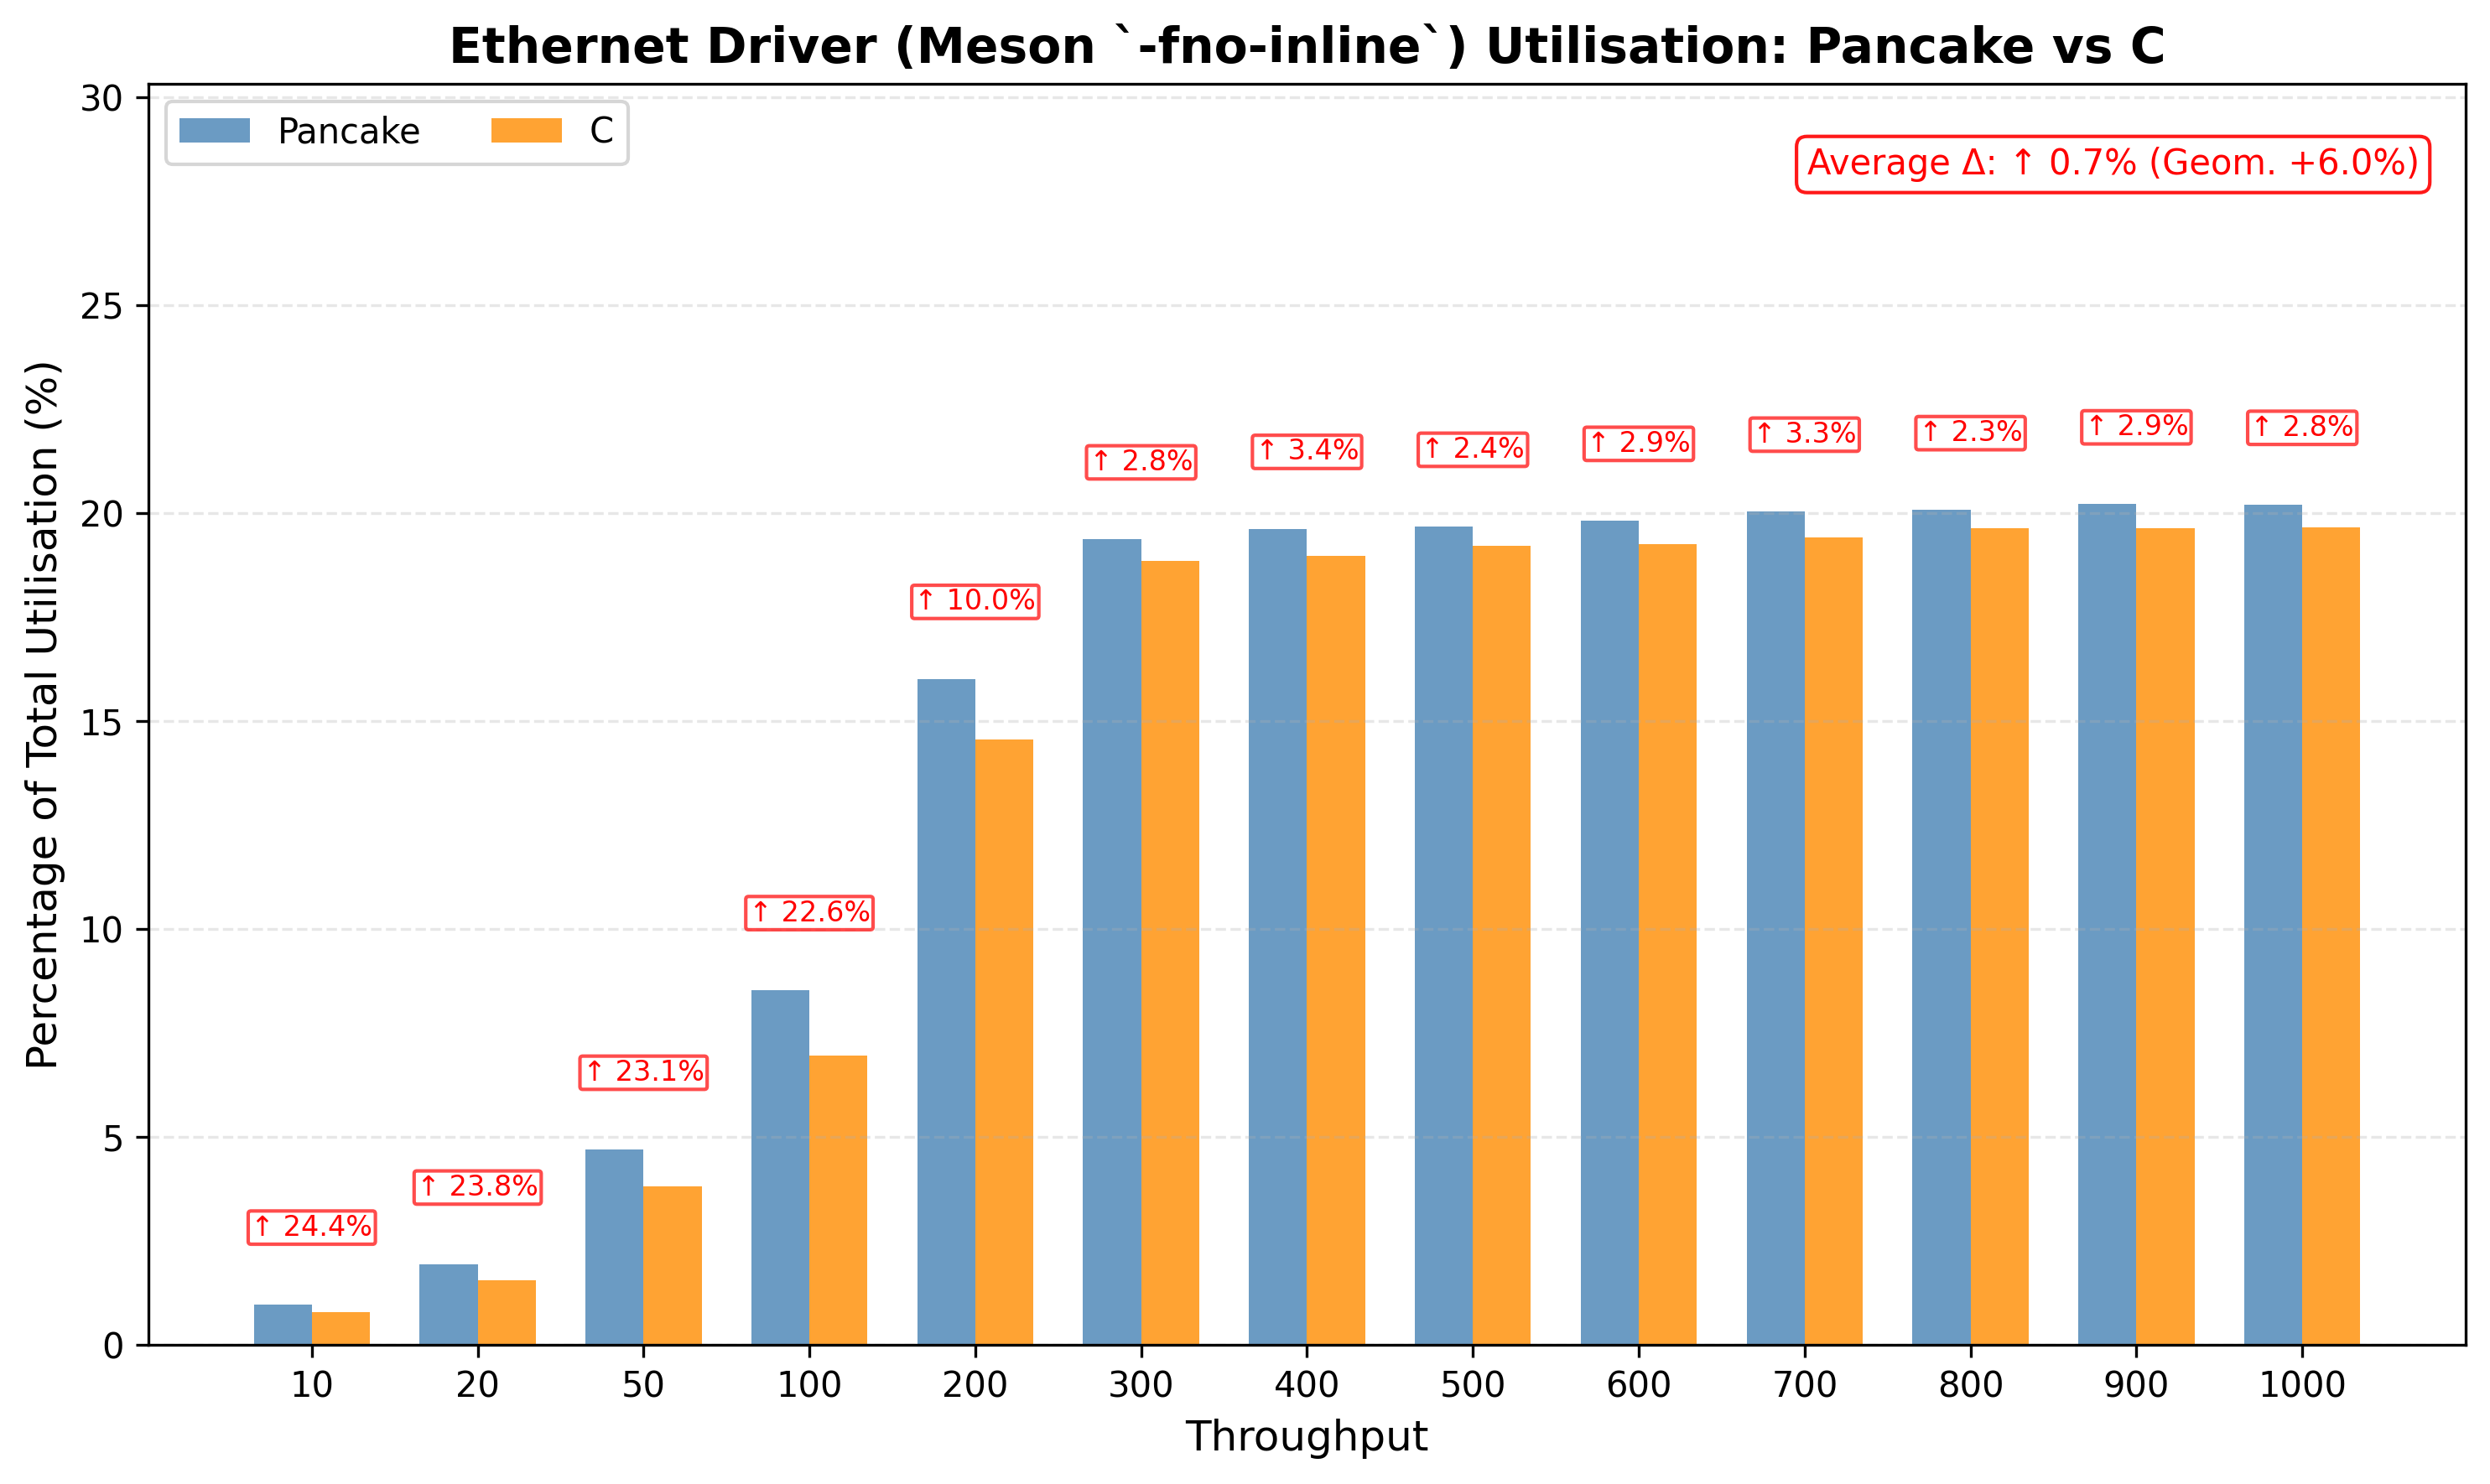

In [9]:
from plotter import UtilizationVisualizer

x_labels = ["10", "20", "50", "100", "200", "300", "400", "500", "600", "700", "800", "900", "1000"]
visualizer = UtilizationVisualizer(pnk_data, C_data, name_a="Pancake", name_b="C", x_tick_labels=x_labels)

visualizer.print_available_pds()
visualizer.plot_specific_pd('ethernet_driver (2)', figsize=(10, 6), dpi=300, save_path="pnk_vs_c_ethernet_driver_cycles.png", driver_name="Meson `-fno-inline`", use_percent=True)

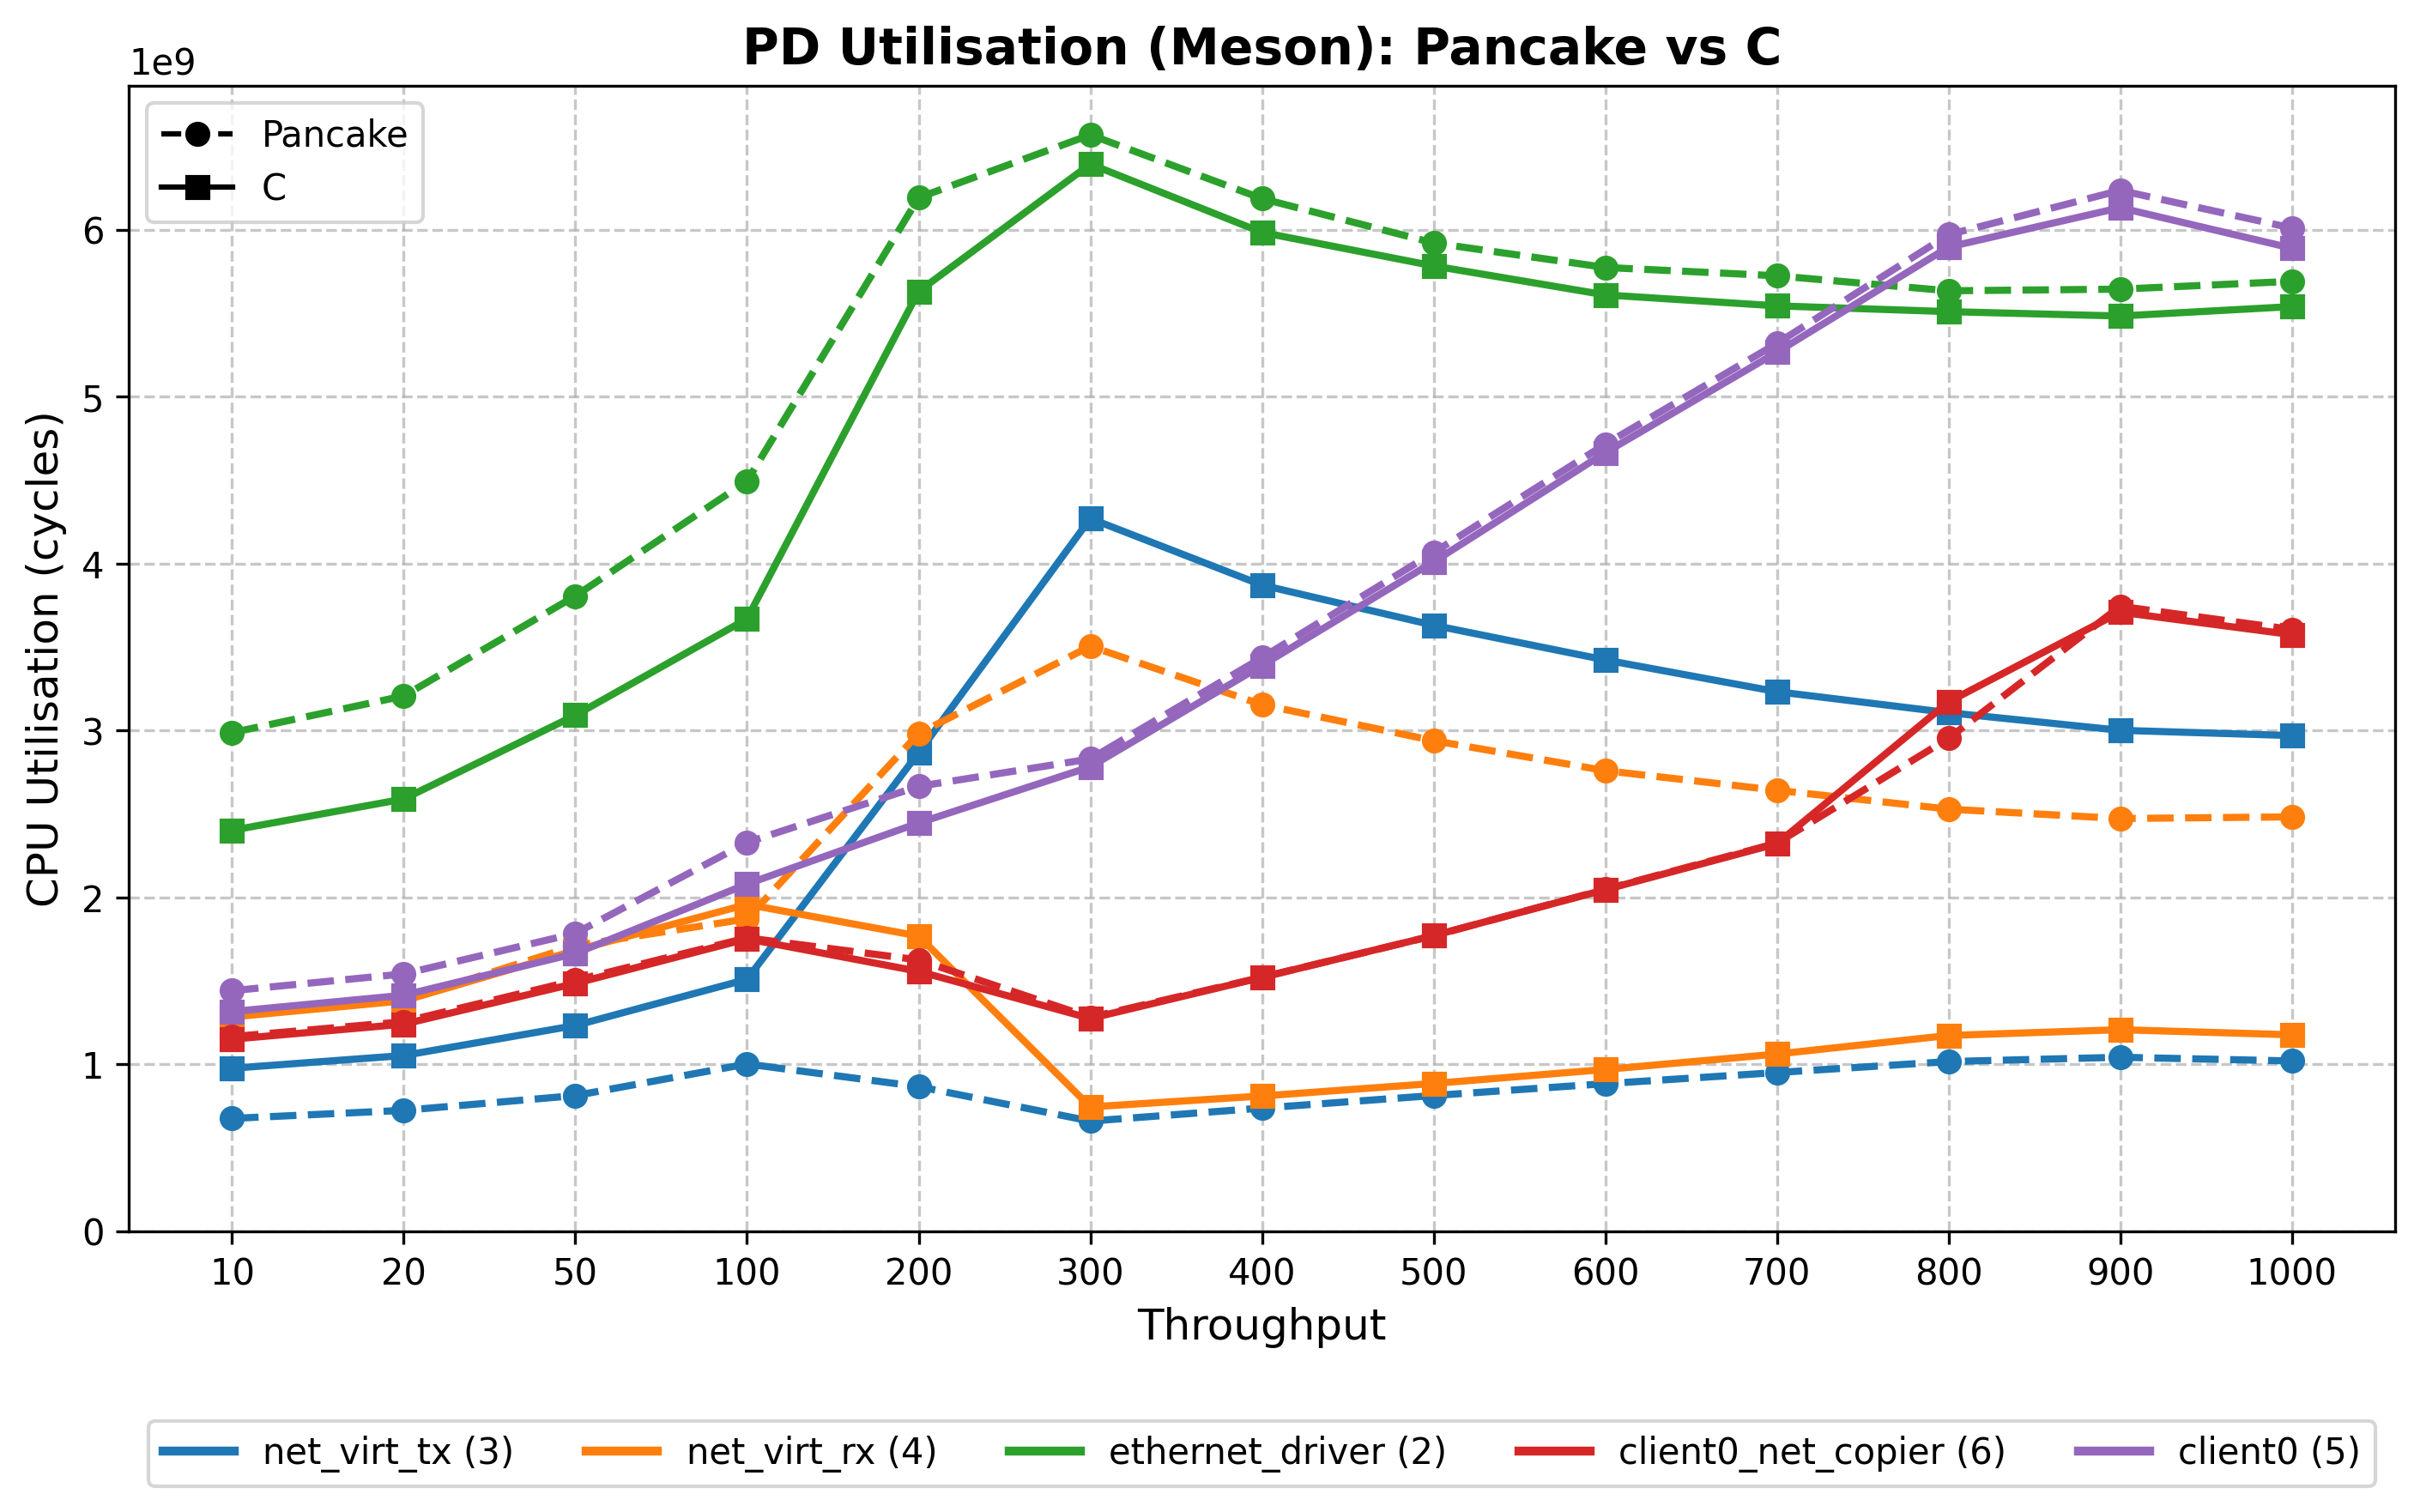

In [10]:
visualizer.set_pds_to_visualize(['net_virt_tx (3)', 'net_virt_rx (4)', 'ethernet_driver (2)', 'client0_net_copier (6)', 'client0 (5)'])
visualizer.plot_all(figsize=(10, 6), dpi=300, save_path="pnk_vs_c_all_pds.svg", driver_name="Meson", use_percent=False)

In [11]:
compcert_data = parse_log_data("new_results/compcert_meson.txt")

Iteration 1: ethernet_driver (2) - Pancake: 2987579978, C: 2401951104, CompCert: 2520525920
Iteration 2: ethernet_driver (2) - Pancake: 3207418970, C: 2589721986, CompCert: 2727936281
Iteration 3: ethernet_driver (2) - Pancake: 3806618624, C: 3091753011, CompCert: 3242350522
Iteration 4: ethernet_driver (2) - Pancake: 4495224183, C: 3669495625, CompCert: 3854685096
Iteration 5: ethernet_driver (2) - Pancake: 6193922061, C: 5632120179, CompCert: 5680247241
Iteration 6: ethernet_driver (2) - Pancake: 6570568563, C: 6395249038, CompCert: 6421466528
Iteration 7: ethernet_driver (2) - Pancake: 6188483952, C: 5985895055, CompCert: 6025898171
Iteration 8: ethernet_driver (2) - Pancake: 5922375893, C: 5785045440, CompCert: 5787450207
Iteration 9: ethernet_driver (2) - Pancake: 5775797703, C: 5611179835, CompCert: 5646158786
Iteration 10: ethernet_driver (2) - Pancake: 5725710883, C: 5545535568, CompCert: 5609503301
Iteration 11: ethernet_driver (2) - Pancake: 5635818409, C: 5510917185, CompCer

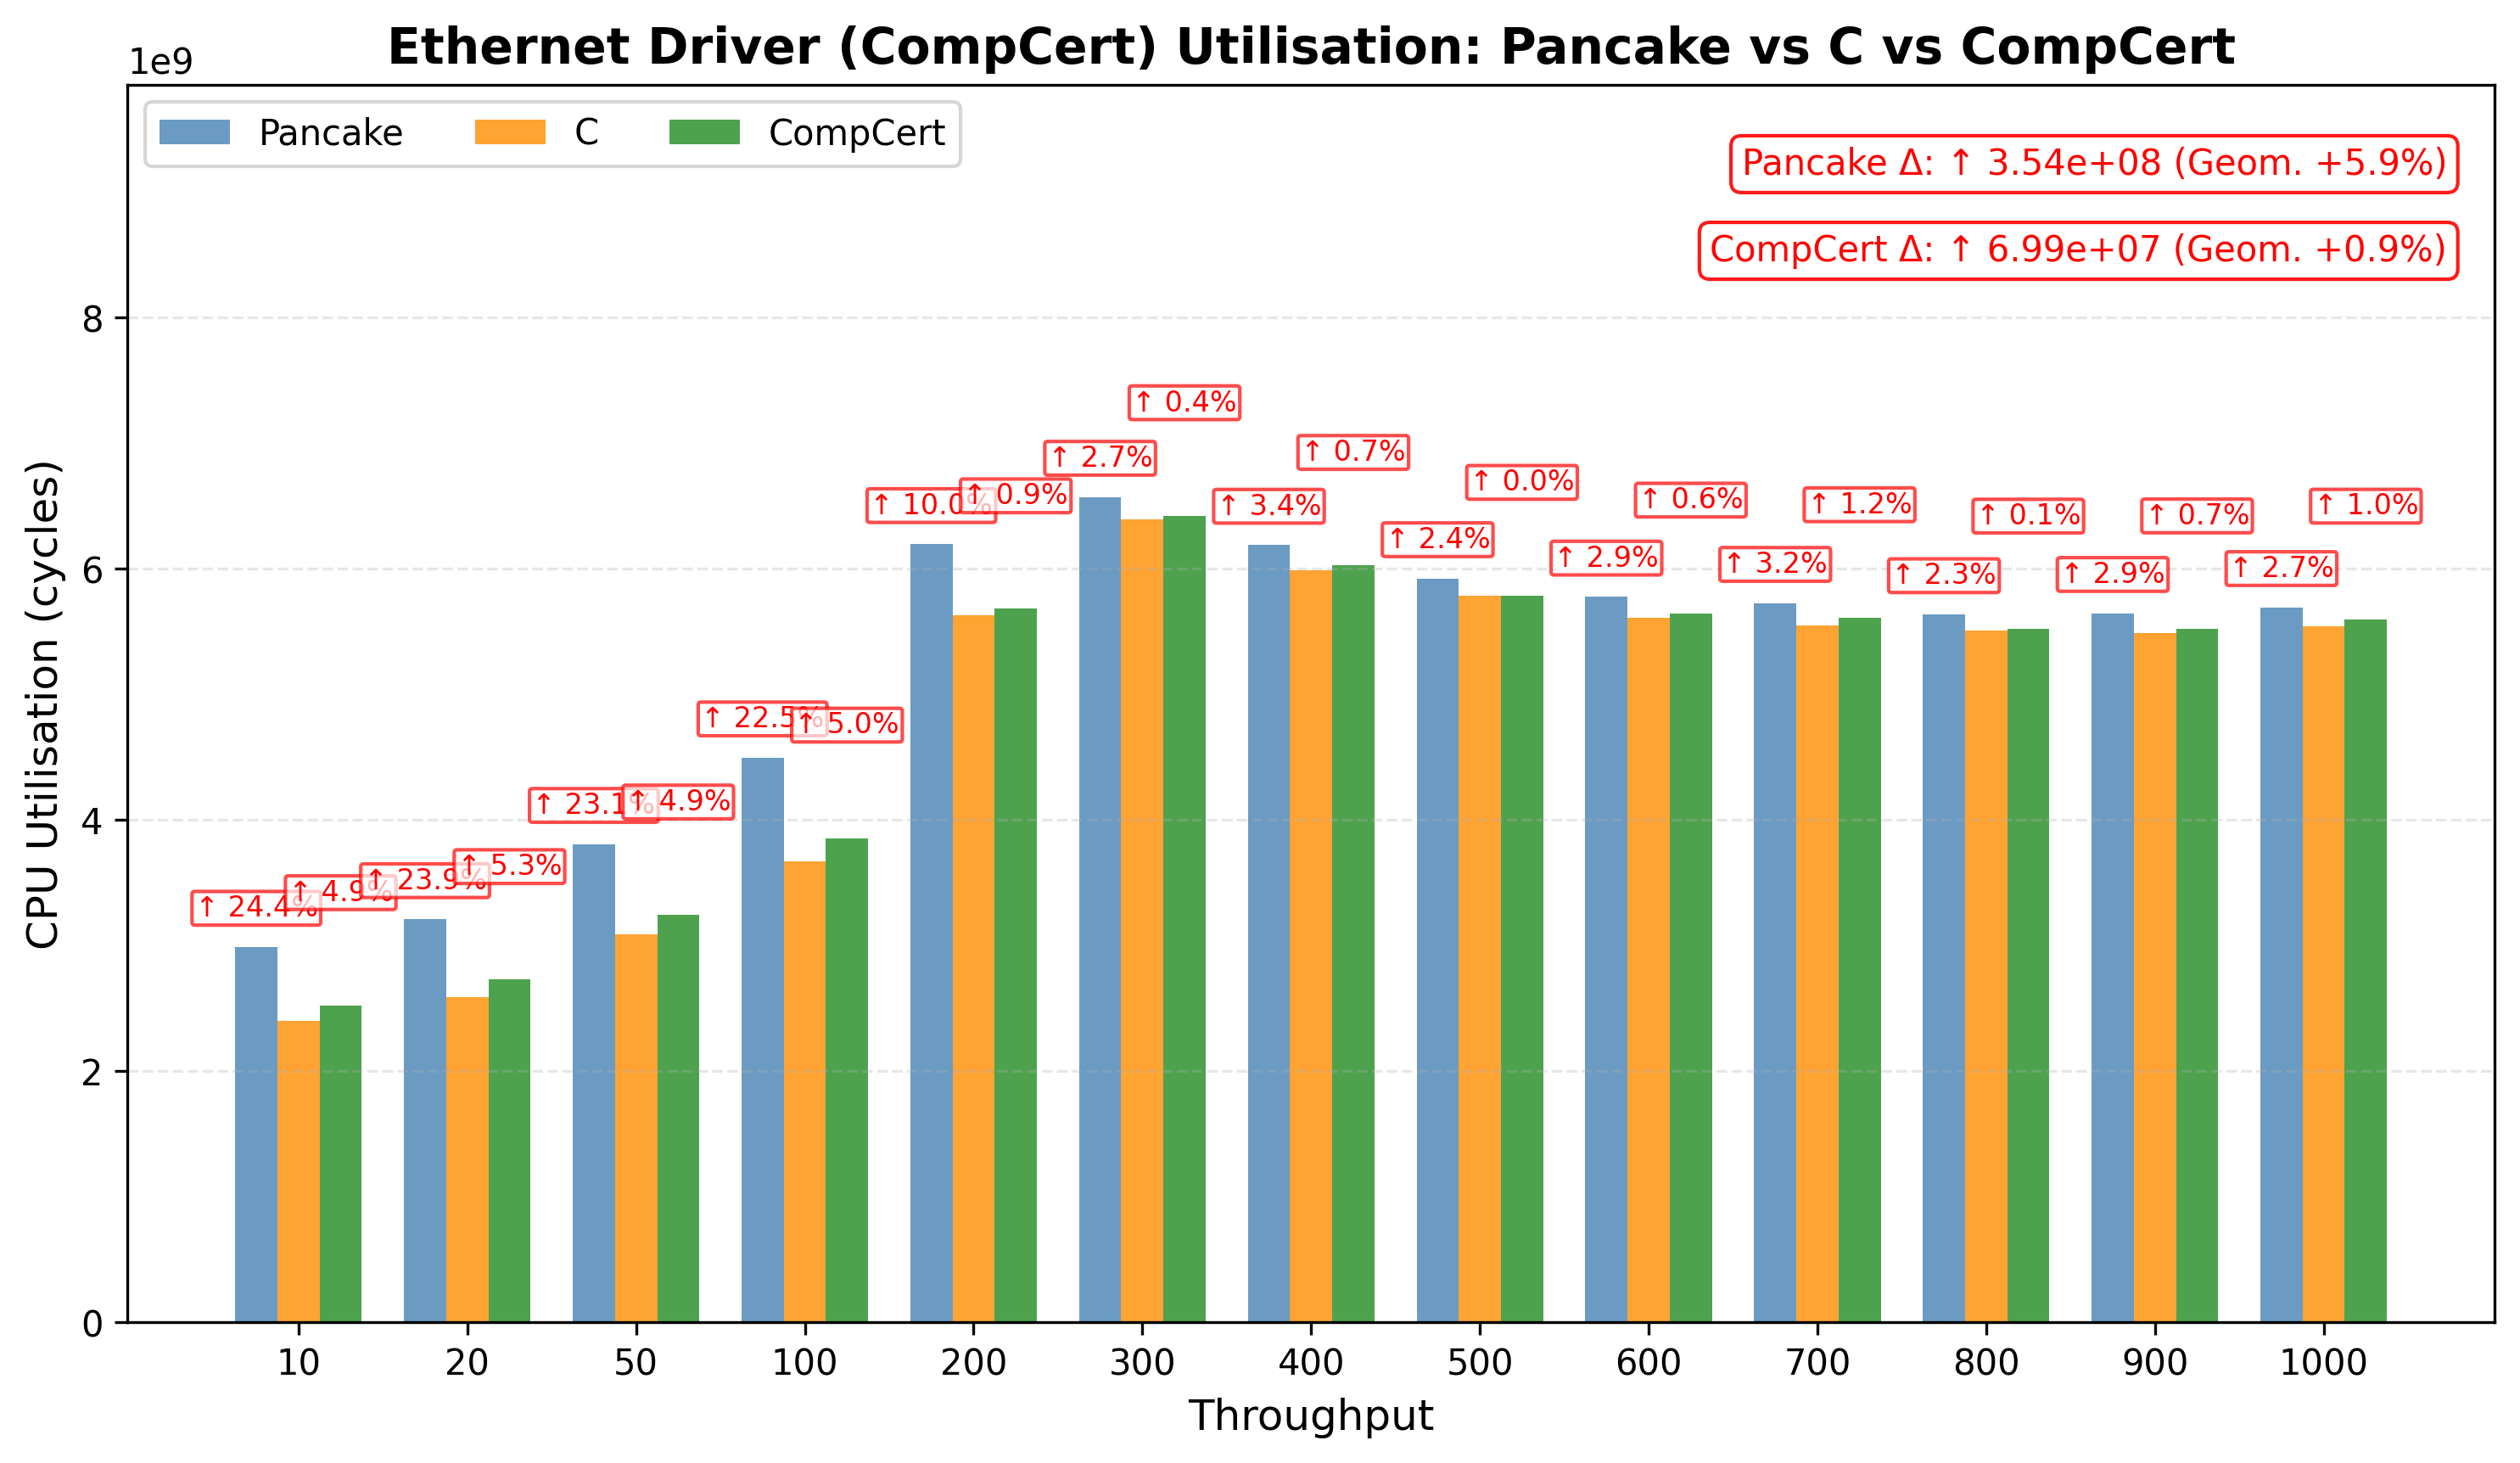

In [12]:
visualizer.plot_specific_pd_with_new_data_2('ethernet_driver (2)', compcert_data, "CompCert",figsize=(10, 6), dpi=300, save_path="pnk_vs_c_ethernet_driver_cycles_compcert.png", driver_name="CompCert", use_percent=False)